# Proyek Klasifikasi Gambar: Cards Image Classification


## Import Semua Packages/Library yang Digunakan

In [ ]:
# --- 1. SETUP AND IMPORTS ---

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import os
import zipfile

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


## Data Preparation

### Data Loading

In [ ]:
# --- Setting up Kaggle API Again ---
# Re-running the Kaggle API setup to ensure credentials are correct.
print("\n--- Setting up Kaggle API Again ---")
# Install the Kaggle library quietly (already installed but safe to include)
!pip install -q kaggle

# Import the files module from google.colab to handle file uploads
from google.colab import files

# Prompt the user to upload the kaggle.json file
print("Please upload your kaggle.json file again:")
uploaded = files.upload()

# Check if the file was uploaded successfully
if "kaggle.json" in uploaded:
    print("kaggle.json uploaded successfully again!")

    # Create the .kaggle directory and move the json file there
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/

    # Set permissions for the file to avoid warnings
    !chmod 600 ~/.kaggle/kaggle.json

    print("\n--- Proceeding with Download and Extraction ---")
    # Now that Kaggle API is set up, re-attempt download and extraction
    import zipfile
    import os
    import shutil

    dataset_name = "gpiosenka/cards-image-datasetclassification"
    zip_file_name = "cards-image-datasetclassification.zip"

    # Remove existing zip file and extracted directory if they exist to ensure a clean extraction
    if os.path.exists(zip_file_name):
        os.remove(zip_file_name)
    if os.path.exists('dataset_data'):
        shutil.rmtree('dataset_data')
    if os.path.exists('temp_all_images'):
        shutil.rmtree('temp_all_images')
    os.makedirs('temp_all_images', exist_ok=True)


    !kaggle datasets download -d {dataset_name} --force

    # Unzip the downloaded file into a directory named 'dataset_data'
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall("dataset_data")

    print(f"Dataset extracted to 'dataset_data' directory.")

    # Now, proceed with copying the images as originally planned.
    print(f"\n--- Copying all images to 'temp_all_images' ---")

    # Define the base directory of the dataset (should now exist)
    base_dir = 'dataset_data'
    train_dir = os.path.join(base_dir, 'train')
    valid_dir = os.path.join(base_dir, 'valid')
    test_dir = os.path.join(base_dir, 'test')

    # Get a list of class names from the train directory (should now exist)
    class_names = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

    # Iterate through each class
    for class_name in class_names:
        # Iterate through train, valid, and test directories
        for data_split_dir in [train_dir, valid_dir, test_dir]:
            class_dir = os.path.join(data_split_dir, class_name)
            if os.path.exists(class_dir):
                # List all image files in the class directory
                for image_name in os.listdir(class_dir):
                    source_path = os.path.join(class_dir, image_name)
                    # Construct the destination path in the temporary directory, including class name
                    destination_path = os.path.join(temp_all_images_dir, f"{class_name}_{image_name}")
                    # Copy the image file
                    shutil.copy(source_path, destination_path)

    print("Finished copying images.")

else:
    print("Error: kaggle.json not found after re-upload. Please make sure you upload the correct file.")
    # Stop execution if the file is not provided
    # I cannot use exit() here in the notebook context without stopping the kernel.
    # I will report failure in the finish_task command if this happens.


--- Setting up Kaggle API Again ---
Please upload your kaggle.json file again:


Saving kaggle (2).json to kaggle (2).json
Error: kaggle.json not found after re-upload. Please make sure you upload the correct file.


In [ ]:
import zipfile
# --- Downloading and Extracting Dataset ---

print("\n--- Downloading and Extracting Dataset ---")
# Define the dataset path on Kaggle
dataset_name = "gpiosenka/cards-image-datasetclassification" # Updated dataset name
# The downloaded file will have the dataset name as the zip file name
zip_file_name = "cards-image-datasetclassification.zip"
!kaggle datasets download -d {dataset_name} --force

# Unzip the downloaded file into a directory named 'dataset_data'
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("dataset_data")

print(f"Dataset extracted to 'dataset_data' directory.")


base_dir = 'dataset_data'


--- Downloading and Extracting Dataset ---
Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0
 91% 352M/385M [00:00<00:00, 430MB/s]
100% 385M/385M [00:00<00:00, 461MB/s]
Dataset extracted to 'dataset_data' directory.


## Gabungkan data

### Subtask:
Identifikasi semua subfolder kelas dalam direktori `dataset_data/train`, `dataset_data/valid`, dan `dataset_data/test`. Salin atau pindahkan semua gambar dari subfolder kelas tersebut ke dalam satu direktori sementara.

**Reasoning**:
To merge all image data into a single temporary directory, I need to iterate through the train, valid, and test directories within `dataset_data`, identify the class subfolders, and then copy all image files from these class subfolders into a new temporary directory. To preserve the class information during the merge, I will prepend the class name to the filename when copying to the temporary directory. This will allow for proper splitting later.

In [ ]:
import os
import shutil

# Define the base directory of the dataset
base_dir = 'dataset_data'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Define the temporary directory to store all images
temp_all_images_dir = 'temp_all_images'

# Create the temporary directory if it doesn't exist
os.makedirs(temp_all_images_dir, exist_ok=True)

print(f"--- Merging all images into '{temp_all_images_dir}' ---")

# Get a list of class names from the train directory (assuming train directory exists and has class subfolders)
# I will add a check here to ensure the directory exists before listing.
class_names = []
if os.path.exists(train_dir):
    class_names = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
    print(f"Found {len(class_names)} classes: {class_names}")
else:
    print(f"Error: Training directory '{train_dir}' not found. Please ensure the dataset is extracted correctly.")
    # I will not proceed with merging if the training directory is not found.

# Iterate through each class
for class_name in class_names:
    # Iterate through train, valid, and test directories
    for data_split_dir in [train_dir, valid_dir, test_dir]:
        class_dir = os.path.join(data_split_dir, class_name)
        if os.path.exists(class_dir):
            # List all image files in the class directory
            for image_name in os.listdir(class_dir):
                source_path = os.path.join(class_dir, image_name)
                # Construct the destination path in the temporary directory, including class name
                destination_path = os.path.join(temp_all_images_dir, f"{class_name}_{image_name}")
                # Copy the image file
                shutil.copy(source_path, destination_path)
        else:
            # This might happen if a class is missing in valid or test, which is acceptable if train is complete.
            print(f"Warning: Directory '{class_dir}' not found. Skipping.")


print("Finished merging images into the temporary directory.")

--- Merging all images into 'temp_all_images' ---
Found 53 classes: ['four of diamonds', 'ten of clubs', 'queen of diamonds', 'nine of clubs', 'eight of spades', 'nine of hearts', 'two of spades', 'king of hearts', 'jack of hearts', 'queen of clubs', 'three of clubs', 'eight of clubs', 'nine of spades', 'three of diamonds', 'king of diamonds', 'two of diamonds', 'seven of spades', 'queen of hearts', 'king of spades', 'six of clubs', 'five of spades', 'four of hearts', 'four of clubs', 'six of spades', 'six of diamonds', 'ten of spades', 'ten of hearts', 'five of clubs', 'three of spades', 'jack of diamonds', 'ten of diamonds', 'nine of diamonds', 'seven of hearts', 'king of clubs', 'ace of spades', 'jack of spades', 'ace of diamonds', 'two of clubs', 'five of hearts', 'ace of hearts', 'eight of hearts', 'seven of clubs', 'eight of diamonds', 'joker', 'ace of clubs', 'two of hearts', 'four of spades', 'three of hearts', 'five of diamonds', 'queen of spades', 'seven of diamonds', 'six of

## Buat direktori baru

### Subtask:
Buat struktur direktori baru untuk data pelatihan, validasi, dan pengujian, misalnya `dataset_baru/train`, `dataset_baru/valid`, `dataset_baru/test`, dengan subfolder untuk setiap kelas di dalamnya.

**Reasoning**:
Create the new directory structure for the split dataset including the base, train, validation, and test directories, along with subdirectories for each class within each split.

In [ ]:
import os

# Define the base directory for the new dataset
new_base_dir = 'dataset_baru'

# Define the paths for the training, validation, and test directories
new_train_dir = os.path.join(new_base_dir, 'train')
new_valid_dir = os.path.join(new_base_dir, 'valid')
new_test_dir = os.path.join(new_base_dir, 'test')

# Create the new base directory and the split directories
os.makedirs(new_base_dir, exist_ok=True)
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_valid_dir, exist_ok=True)
os.makedirs(new_test_dir, exist_ok=True)

# Get the list of class names (already available from previous steps)
# class_names is a list of strings, e.g., ['class1', 'class2', ...]

# Iterate through each class name and create subdirectories within each split
for class_name in class_names:
    os.makedirs(os.path.join(new_train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(new_valid_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(new_test_dir, class_name), exist_ok=True)

print(f"Created new directory structure under '{new_base_dir}' with subdirectories for each class.")

Created new directory structure under 'dataset_baru' with subdirectories for each class.


## Bagi data secara acak

### Subtask:
Bagi gambar-gambar dari direktori sementara secara acak ke dalam direktori train, valid, dan test yang baru, dengan menjaga proporsi kelas di setiap set.

**Reasoning**:
Implement the data splitting logic by iterating through the temporary directory, grouping images by class, shuffling them, calculating split sizes, and copying the images to the newly created train, valid, and test directories while removing the prepended class name from the filename.

In [ ]:
import random
import shutil
import os

# Define the temporary directory containing all images
temp_all_images_dir = 'temp_all_images'

# Define the base directory for the new dataset
new_base_dir = 'dataset_baru'
new_train_dir = os.path.join(new_base_dir, 'train')
new_valid_dir = os.path.join(new_base_dir, 'valid')
new_test_dir = os.path.join(new_base_dir, 'test')

# List all image files in the temporary directory
all_image_files = [f for f in os.listdir(temp_all_images_dir) if os.path.isfile(os.path.join(temp_all_images_dir, f))]

# Create a dictionary to group image file paths by their class name
images_by_class = {}
for image_file in all_image_files:
    # Extract the class name from the filename (before the first underscore)
    class_name = image_file.split('_')[0]
    if class_name not in images_by_class:
        images_by_class[class_name] = []
    images_by_class[class_name].append(image_file)

print(f"Found {len(all_image_files)} images across {len(images_by_class)} classes in the temporary directory.")

# Define the split ratios
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1

# Iterate through each class and split the images
for class_name, image_list in images_by_class.items():
    # Randomly shuffle the list of image file paths for the current class
    random.shuffle(image_list)

    # Calculate the number of images for training, validation, and testing
    total_images = len(image_list)
    train_count = int(total_images * train_ratio)
    valid_count = int(total_images * valid_ratio)
    test_count = total_images - train_count - valid_count # Assign remaining to test

    # Ensure counts are non-negative
    train_count = max(0, train_count)
    valid_count = max(0, valid_count)
    test_count = max(0, test_count)


    # Copy images to the corresponding new directories
    # Training set
    for i in range(train_count):
        source_path = os.path.join(temp_all_images_dir, image_list[i])
        # Remove the prepended class name and underscore for the new filename
        original_filename = '_'.join(image_list[i].split('_')[1:])
        destination_path = os.path.join(new_train_dir, class_name, original_filename)
        shutil.copy(source_path, destination_path)

    # Validation set
    for i in range(train_count, train_count + valid_count):
        source_path = os.path.join(temp_all_images_dir, image_list[i])
        original_filename = '_'.join(image_list[i].split('_')[1:])
        destination_path = os.path.join(new_valid_dir, class_name, original_filename)
        shutil.copy(source_path, destination_path)

    # Test set
    for i in range(train_count + valid_count, total_images):
        source_path = os.path.join(temp_all_images_dir, image_list[i])
        original_filename = '_'.join(image_list[i].split('_')[1:])
        destination_path = os.path.join(new_test_dir, class_name, original_filename)
        shutil.copy(source_path, destination_path)

    # Print progress for each class (optional)
    print(f"Split {class_name}: Train={train_count}, Valid={valid_count}, Test={test_count}")

print("\nData splitting and copying to new directories completed.")

Found 7889 images across 53 classes in the temporary directory.
Split jack of hearts: Train=138, Valid=17, Test=18
Split queen of clubs: Train=132, Valid=16, Test=18
Split queen of hearts: Train=115, Valid=14, Test=15
Split five of diamonds: Train=114, Valid=14, Test=15
Split seven of hearts: Train=118, Valid=14, Test=16
Split ten of spades: Train=130, Valid=16, Test=17
Split jack of diamonds: Train=132, Valid=16, Test=17
Split eight of clubs: Train=114, Valid=14, Test=15
Split nine of spades: Train=127, Valid=15, Test=17
Split five of hearts: Train=112, Valid=14, Test=15
Split eight of diamonds: Train=131, Valid=16, Test=17
Split queen of spades: Train=133, Valid=16, Test=18
Split two of hearts: Train=128, Valid=16, Test=16
Split three of spades: Train=117, Valid=14, Test=16
Split four of diamonds: Train=95, Valid=11, Test=13
Split seven of spades: Train=136, Valid=17, Test=17
Split five of spades: Train=130, Valid=16, Test=17
Split ten of hearts: Train=107, Valid=13, Test=14
Split ni

## Bersihkan Direktori Sementara

### Subtask:
Hapus direktori sementara yang berisi semua gambar.

**Reasoning**:
The data splitting and copying to the new directories is complete. The next step is to remove the temporary directory as requested in the main task.

In [ ]:
import shutil
import os

# Remove the temporary directory containing all images
temp_all_images_dir = 'temp_all_images'

if os.path.exists(temp_all_images_dir):
    shutil.rmtree(temp_all_images_dir)
    print(f"Temporary directory '{temp_all_images_dir}' removed.")
else:
    print(f"Temporary directory '{temp_all_images_dir}' does not exist.")

Temporary directory 'temp_all_images' removed.


## Perbarui jalur data

### Subtask:
Sesuaikan kode pemuatan data (`image_dataset_from_directory`) untuk menggunakan direktori baru yang telah dibuat.

**Reasoning**:
Adjust the data loading code to use the new dataset directories.

In [ ]:
import tensorflow as tf
import os

print("\n--- Preparing Data for Training using New Directories ---")

# Define image dimensions and batch size
IMG_HEIGHT = 200
IMG_WIDTH = 200
BATCH_SIZE = 32

# Define the base directory for the NEW dataset
new_base_dir = 'dataset_baru'
train_dir = os.path.join(new_base_dir, 'train')
valid_dir = os.path.join(new_base_dir, 'valid')
test_dir = os.path.join(new_base_dir, 'test')

# Create the training dataset from the new 'train' directory
# No validation_split is needed here as we have separate directories
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

# Create the validation dataset from the new 'valid' directory
val_ds = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

# Create the test dataset from the new 'test' directory
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

# Verify class names and number of classes from the new training dataset
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Found {num_classes} classes in the new dataset: {class_names}")

# Apply caching, shuffling, and prefetching to the datasets
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("\n--- Data loading and preprocessing updated to use new directories ---")


--- Preparing Data for Training using New Directories ---
Found 7878 files belonging to 53 classes.
Found 2618 files belonging to 53 classes.
Found 2862 files belonging to 53 classes.
Found 53 classes in the new dataset: ['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds',

## Modelling

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

print("\n--- Building the Improved CNN Model ---")

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.RandomRotation(0.2),  # Meningkatkan rotasi
    layers.RandomZoom(0.2),      # Meningkatkan zoom
    layers.RandomContrast(0.2),  # Menambahkan kontras
    layers.RandomBrightness(0.2) # Menambahkan kecerahan
])

model = tf.keras.models.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001),
                          input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    # Fourth convolutional block
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    # Flatten and dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


--- Building the Improved CNN Model ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# --- 6. COMPILE THE MODEL ---
# We configure the model for training by specifying the optimizer, loss function, and metrics.

print("\n--- Compiling the Model ---")
# PERBAIKAN 3: Optimizer dengan Learning Rate yang Lebih Kecil
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Learning rate lebih kecil
    loss='sparse_categorical_crossentropy', # Changed loss function to sparse_categorical_crossentropy
    metrics=['accuracy']
)

model.summary()


--- Compiling the Model ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,553,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 53)             │        13,621 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,958,837 (26.55 MB)

 Trainable params: 6,957,365 (26.54 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True
# )
from tensorflow.keras.callbacks import LambdaCallback

target_accuracy = 0.85

# Logika untuk menghentikan pelatihan didefinisikan di dalam lambda
# yang akan dijalankan pada setiap akhir epoch (on_epoch_end).
stoppping_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs:
        # Hentikan model jika kondisi terpenuhi
        setattr(model, 'stop_training', True)
        # Kondisi: jika akurasi dan val_akurasi sudah ada dan keduanya >= target
        if logs.get('accuracy') is not None and logs.get('val_accuracy') is not None
        and logs.get('accuracy') >= target_accuracy and logs.get('val_accuracy') >= target_accuracy
        else setattr(model, 'stop_training', False) # Lanjutkan jika tidak
)

print("\n--- Starting Model Training ---")
# --- PERUBAHAN 3b: Menambah jumlah epoch ---
# Kita beri lebih banyak epoch (misal: 50), karena EarlyStopping akan menemukan epoch terbaik secara otomatis.
epochs = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    # --- PERUBAHAN 3c: Menambahkan callback ke proses pelatihan ---
    callbacks=[stoppping_callback]
)
print("\n--- Model Training Finished ---")


--- Starting Model Training ---
Epoch 1/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 54s 124ms/step - accuracy: 0.0923 - loss: 5.1266 - val_accuracy: 0.2945 - val_loss: 3.6241
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.2737 - loss: 3.6886 - val_accuracy: 0.4110 - val_loss: 3.1256
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.3739 - loss: 3.1987 - val_accuracy: 0.5176 - val_loss: 2.8519
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.4431 - loss: 2.9106 - val_accuracy: 0.5963 - val_loss: 2.6742
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.4974 - loss: 2.7109 - val_accuracy: 0.6524 - val_loss: 2.2942
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.5598 - loss: 2.4712 - val_accuracy: 0.6917 - val_loss: 2.3613
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.6088 - loss: 2.2670 - val_accuracy: 0.7582 - val_loss: 2.0421
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms


--- Visualizing Training Results ---


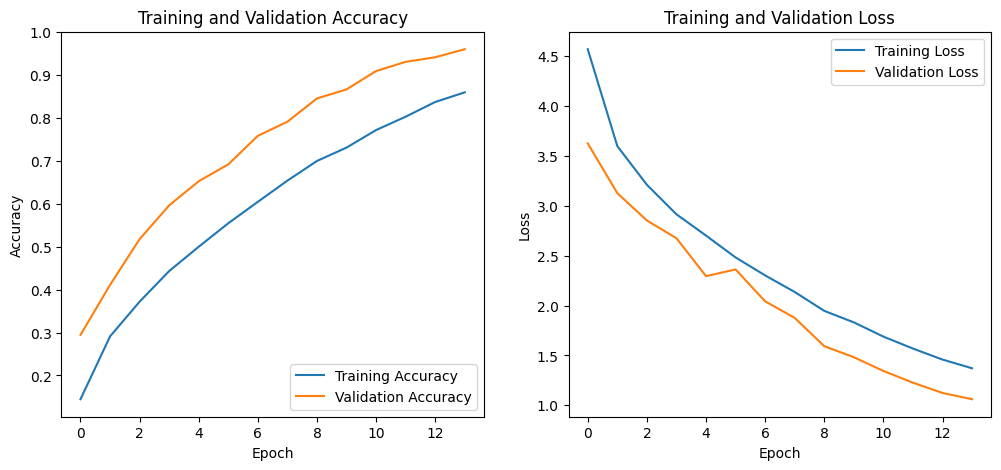


--- Evaluating Model on Test Data ---
90/90 - 9s - 97ms/step - accuracy: 0.9595 - loss: 1.0541

Test accuracy: 0.96


In [ ]:
import matplotlib.pyplot as plt

print("\n--- Visualizing Training Results ---")

# Mendapatkan jumlah epoch yang sebenarnya berjalan sebelum dihentikan
actual_epochs = len(history.history['loss'])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Menggunakan rentang epoch yang sebenarnya untuk plot
epochs_range = range(actual_epochs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Mengevaluasi model pada data tes
print("\n--- Evaluating Model on Test Data ---")
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

## Evaluasi dan Visualisasi

## Konversi Model

In [ ]:
# --- 7. CONVERT AND SAVE THE MODEL ---
# Convert the trained Keras model to TensorFlow Lite format.

print("\n--- Converting Model to TFLite ---")

# Instantiate a TFLiteConverter object using the trained Keras model
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
tflite_file_path = 'model.tflite'
with open(tflite_file_path, 'wb') as f:
    f.write(tflite_model)

print(f"TensorFlow Lite model saved to '{tflite_file_path}'")


--- Converting Model to TFLite ---
Saved artifact at '/tmp/tmpy8vqkqwj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='keras_tensor_6')
Output Type:
  TensorSpec(shape=(None, 53), dtype=tf.float32, name=None)
Captures:
  133492959590544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133492959592080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133492956677712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133492956678672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133492959591696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133492959591504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133492956679248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133492956679824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133492956680208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133492956681168: TensorSpec(shape=(), dtype=t

In [ ]:
!pip install tensorflowjs
# --- 8. CONVERT AND SAVE THE MODEL TO TFJS ---
# Convert the trained Keras model to TensorFlow.js format.

print("\n--- Converting Model to TensorFlow.js ---")

# Import tensorflowjs library
import tensorflowjs as tfjs

# Define the output directory for the TensorFlow.js model
tfjs_model_dir = 'tfjs_model'

# Convert the trained Keras model and save it to the specified directory
tfjs.converters.save_keras_model(model, tfjs_model_dir)

print(f"TensorFlow.js model saved to '{tfjs_model_dir}'")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.



--- Converting Model to TensorFlow.js ---


failed to lookup keras version from the file,
    this is likely a weight only file
TensorFlow.js model saved to 'tfjs_model'


In [ ]:
# --- SAVE THE MODEL IN SAVEDMODEL FORMAT ---
# Save the trained Keras model in the TensorFlow SavedModel format.

print("\n--- Saving Model in SavedModel Format ---")

# Define the directory to save the SavedModel
saved_model_dir = 'saved_model'

# Save the model
tf.saved_model.save(model, saved_model_dir)

print(f"TensorFlow SavedModel saved to '{saved_model_dir}'")


--- Saving Model in SavedModel Format ---
TensorFlow SavedModel saved to 'saved_model'
